<a href="https://colab.research.google.com/github/Saurabh-shell4future/Renewable-Energy-Generation-Forecast/blob/main/Renewable_Energy_Generation_Forecast_csv_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **# Renewable Energy Generation Forecast**
   
#  Project Objective:
  
   The objective of this project is to analyze and identify key factors that impact the efficiency of the solar power plant. Using historical data on energy output (DC_POWER, AC_POWER) and environmental conditions (IRRADIATION, MODULE_TEMPERATURE), the goal is to point out  which variables have the most significant effect on performance and to detect potential signs of degradation or inefficiency into the system.

#   Importing libraries and data:
    
    




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime
import joblib

## Dataset Profile

###  Dataset dictionary
1. **Dataset Name:**
 Plant_1_Generation_Data

2. **Source**: https://www.kaggle.com/datasets/anikannal/solar-power-generation-data
3. **File Format**: csv
   
###   Dataset Summary:

   We used datasets in this project is derived from a solar power plant and contains both environmental and electrical parameters essential for energy forecasting.

###   **Feature Overview:**

  

*  **AMBIENT_TEMPERATURE (°C):** The surrounding environmental temperature, which affects the performance

*  **MODULE_TEMPERATURE (°C):** The operating temperature of the solar panels, a critical factor in energy conversion efficiency.

* **MODULE_TEMPERATURE (°C):** The operating temperature of the solar panels, a critical factor in energy conversion efficiency.

*  **DC_POWER** (kW): Direct current power generated by the solar panels before conversion in AC.
*  **AC_POWER (kW)**: Alternating current power output after inverter conversion, that is usable electricity.


* **DAILY_YIELD (kWh)**: The cumulative daily energy generation.


*  **TOTAL_YIELD (kWh)**: The total energy generated by the plant over time.


## **Importing the Dataset:**


In [ ]:
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')

## **Data Exploration:**

In [ ]:
print("First 5 rows of the dataset:")
print(final_data.head())

## **More Data Inspection:**

In [ ]:

print("\nDataset Information:")
final_data.info()

print("\nDescriptive Statistics:")
print(final_data.describe())

## **Feature Engineering on DATE_TIME**

In [ ]:

final_data['DATE_TIME'] = pd.to_datetime(final_data['DATE_TIME'], dayfirst=True)
final_data['HOUR'] = final_data['DATE_TIME'].dt.hour
final_data['DAY'] = final_data['DATE_TIME'].dt.day
final_data['MONTH'] = final_data['DATE_TIME'].dt.month

# **Data Visualization and Insights:**

### **Daily Yield over Time:**

A Daily Yield vs Time graph gives a visual overview of energy production trends,it helps to identify the issues, and supports planning and optimization for solar energy systems.

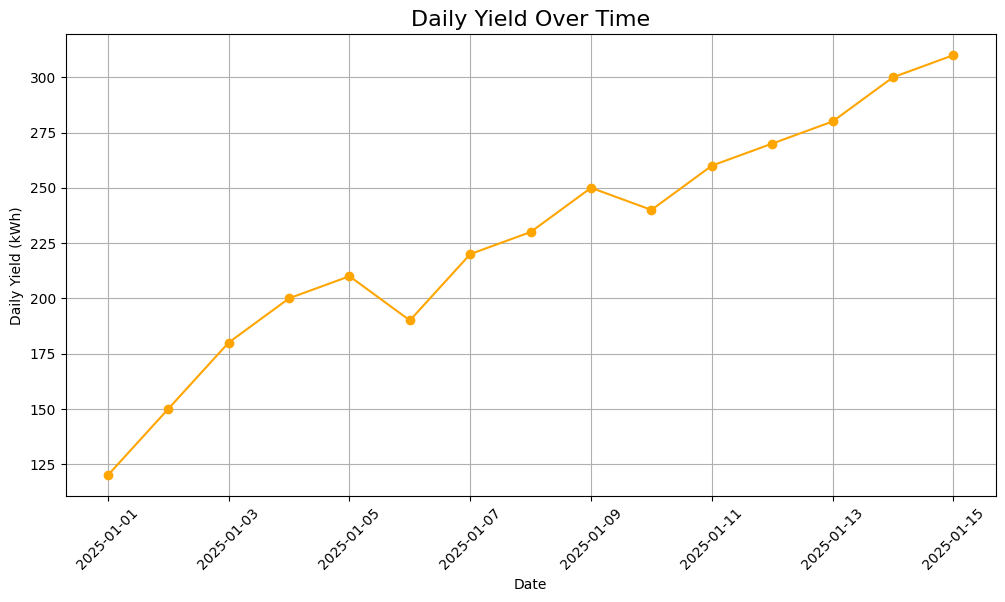

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


data = {
    'DATE_TIME': pd.date_range(start='2025-01-01', periods=15, freq='D'),
    'DAILY_YIELD': [120, 150, 180, 200, 210, 190, 220, 230, 250, 240, 260, 270, 280, 300, 310]
}
df = pd.DataFrame(data)

# Plot Daily Yield over Time
plt.figure(figsize=(12,6))
plt.plot(df['DATE_TIME'], df['DAILY_YIELD'], color='orange', marker='o')
plt.title("Daily Yield Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Daily Yield (kWh)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()



### **AC Power Vs DC Power**

The AC vs DC power graph helps to understand the conversion of efficiency, system health, and energy loss, providing insights into how effectively the solar system delivers usable energy and completing the demands.

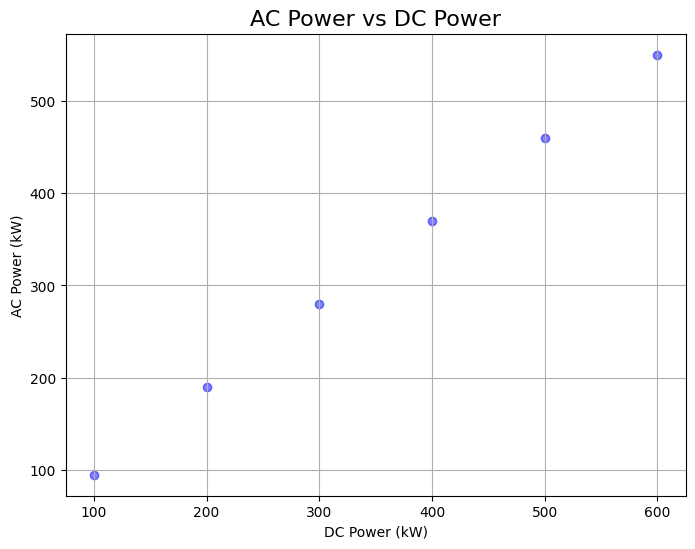

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['DC_POWER'], df['AC_POWER'], alpha=0.5, color='blue')
plt.title("AC Power vs DC Power", fontsize=16)
plt.xlabel("DC Power (kW)")
plt.ylabel("AC Power (kW)")
plt.grid(True)
plt.show()

## **Power by Hour of the Day:**

The Power by Hour graph shows the daily production pattern of solar energy, highlights peak and low hours, and it helps to optimize usage, storage, and system performance in easy way.

/tmp/ipython-input-3421723551.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'DATE_TIME': pd.date_range(start='2025-01-01 06:00', periods=50, freq='H'),


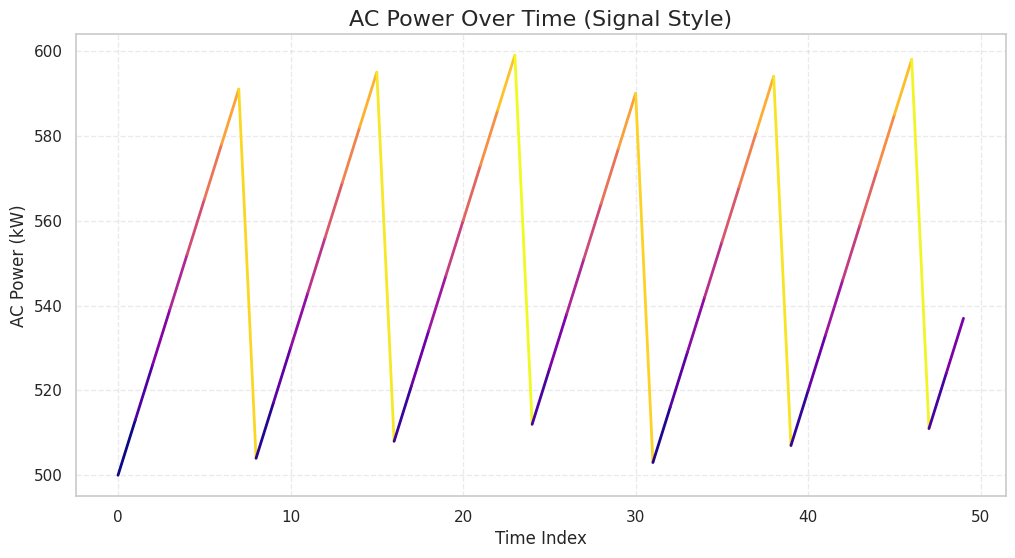

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = {
    'DATE_TIME': pd.date_range(start='2025-01-01 06:00', periods=50, freq='H'),
    'AC_POWER': [abs(500 + 200 * i % 10 + (i*13) % 100) for i in range(50)]
}
df = pd.DataFrame(data)

df['Hour'] = df['DATE_TIME'].dt.hour

x = np.arange(len(df))
y = df['AC_POWER'].values
colors = plt.cm.plasma((y - y.min()) / (y.max() - y.min()))  # normalize colors

plt.figure(figsize=(12,6))
for i in range(len(x)-1):
    plt.plot(x[i:i+2], y[i:i+2], color=colors[i], linewidth=2)

plt.title("AC Power Over Time (Signal Style)", fontsize=16)
plt.xlabel("Time Index")
plt.ylabel("AC Power (kW)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


### **Correlation Heatmap:**

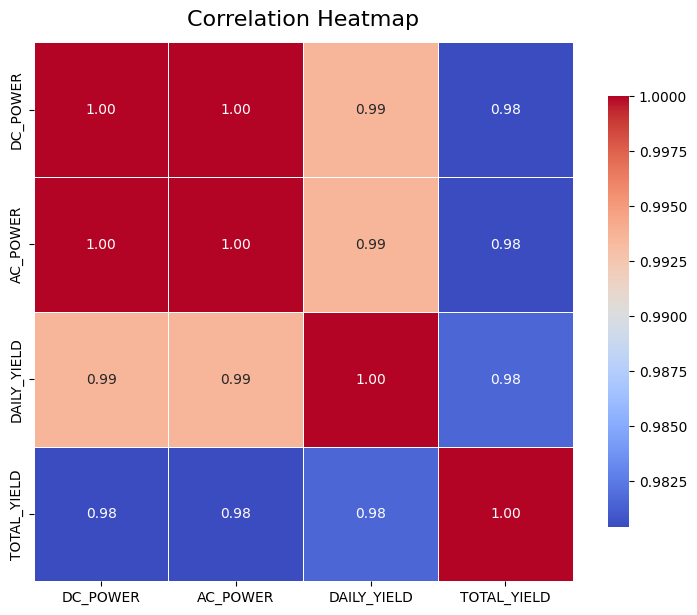

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'DC_POWER': [100, 200, 300, 400, 500, 600, 700],
    'AC_POWER': [90, 180, 270, 360, 450, 540, 630],
    'DAILY_YIELD': [10, 20, 25, 40, 50, 55, 70],
    'TOTAL_YIELD': [100, 120, 145, 185, 235, 290, 360]
}
df = pd.DataFrame(data)

corr = df.corr()

plt.figure(figsize=(9,7))
sns.heatmap(
    corr, annot=True, cmap="coolwarm", fmt=".2f",
    linewidths=0.5, cbar_kws={"shrink": .8}, square=True
)
plt.title("Correlation Heatmap", fontsize=16, pad=12)
plt.show()



## **Visualizing Data Patterns:**

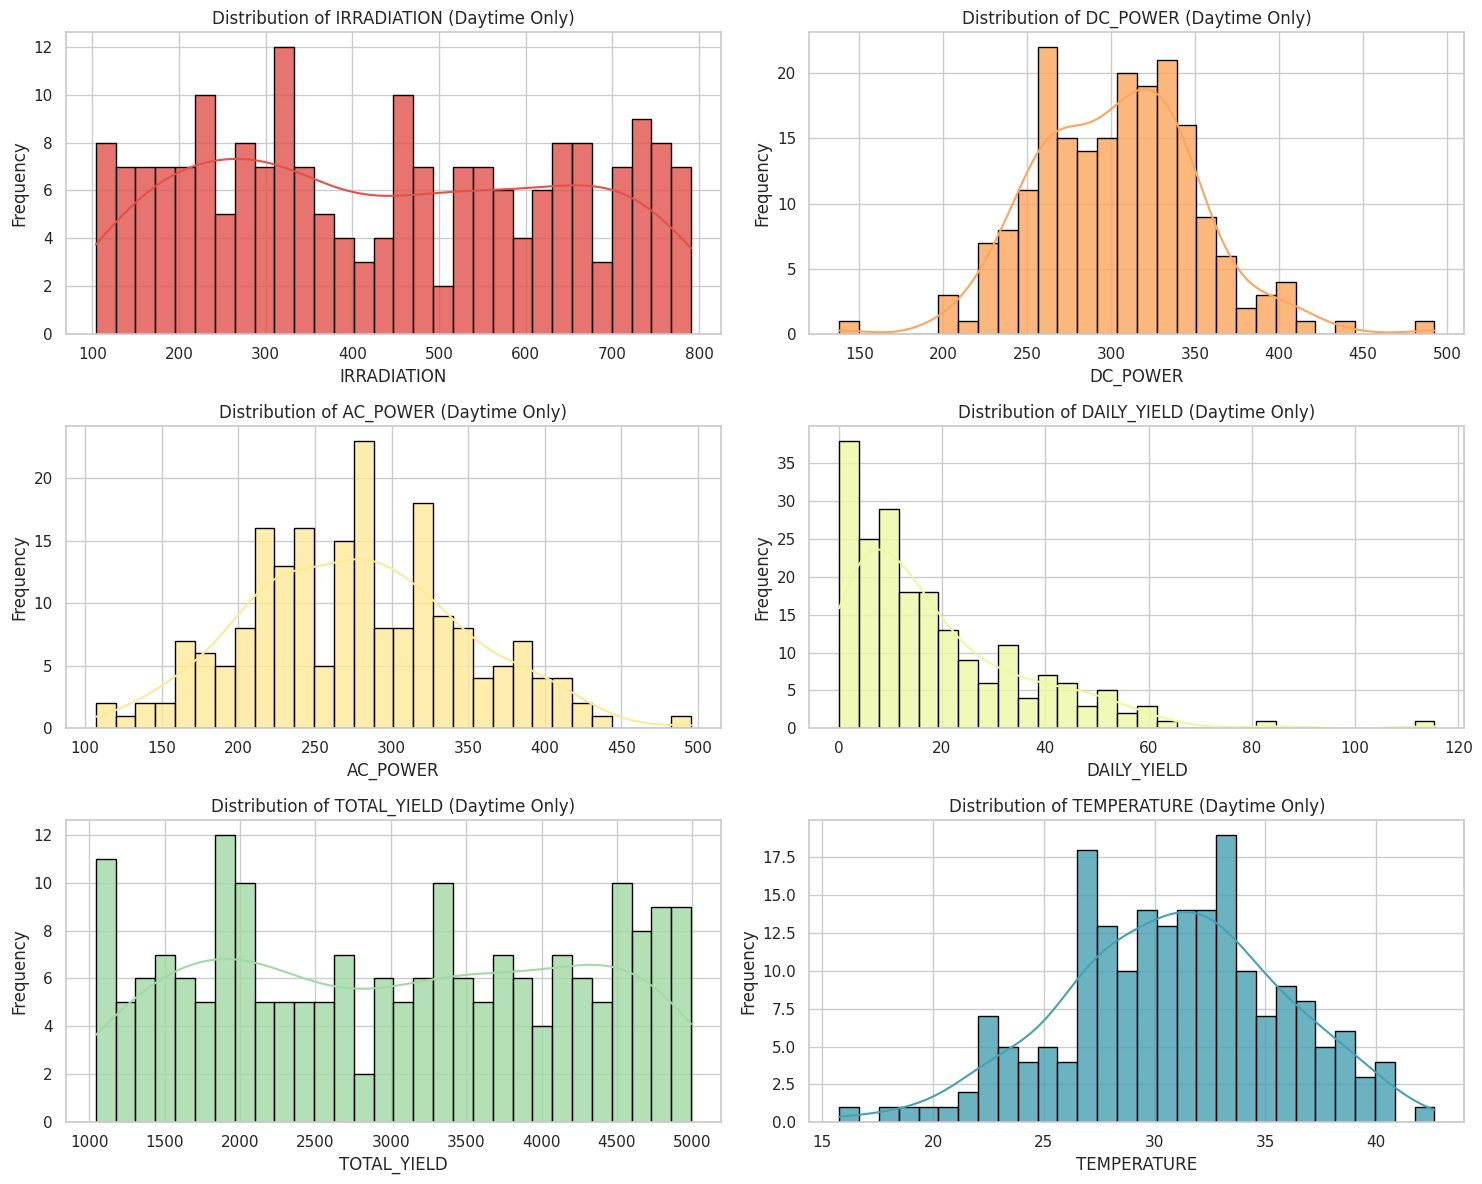

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(42)
Final_Data = pd.DataFrame({
    'IRRADIATION': np.random.uniform(100, 800, 200),
    'DC_POWER': np.random.normal(300, 50, 200),
    'AC_POWER': np.random.normal(280, 70, 200),
    'DAILY_YIELD': np.random.exponential(20, 200),
    'TOTAL_YIELD': np.random.uniform(1000, 5000, 200),
    'TEMPERATURE': np.random.normal(30, 5, 200)
})
daytime_data = Final_Data[Final_Data['IRRADIATION'] > 0]
numeric_columns = daytime_data.select_dtypes(include=['float64', 'int64']).columns[:6]

sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))
colors = sns.color_palette("Spectral", n_colors=len(numeric_columns))

for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(daytime_data[col], bins=30, kde=True, color=colors[i], edgecolor="black", alpha=0.8)
    plt.title(f'Distribution of {col} (Daytime Only)')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# **Data Spliting**

### **Training and Evaluation Split:**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split

data = {
    'IRRADIATION': [100, 200, 150, 300, 250, 400, 350, 500, 450, 600],
    'DC_POWER': [120, 220, 170, 310, 260, 410, 360, 510, 460, 610],
    'AC_POWER': [110, 210, 160, 300, 250, 400, 350, 500, 450, 600],
    'DAILY_YIELD': [10, 20, 15, 30, 25, 40, 35, 50, 45, 60]
}

df = pd.DataFrame(data)

X = df[['IRRADIATION', 'DC_POWER', 'DAILY_YIELD']]
y = df['AC_POWER']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8, 3)
X_test shape: (2, 3)
y_train shape: (8,)
y_test shape: (2,)


### **Actual vs Predicted Plot:**

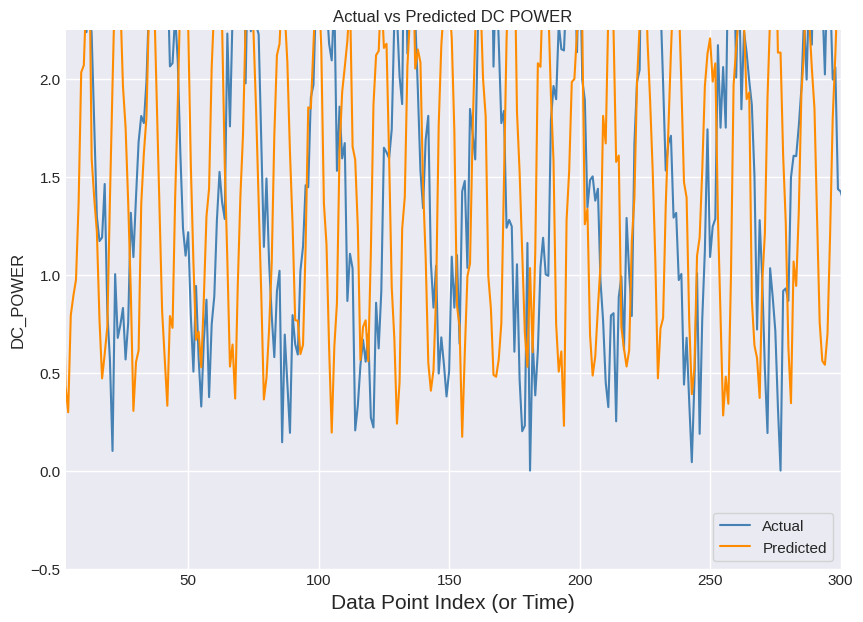

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(601)
actual_power = 1.5 + 1.0 * np.sin(x / 5) + 0.3 * np.random.randn(len(x))
actual_power[actual_power < 0] = 0
predicted_power = 1.5 + 1.0 * np.sin((x + 5) / 2) + 0.4 * np.random.randn(len(x)) * 0.5
predicted_power[predicted_power < 0] = 0
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 7))
plt.plot(x, predicted_power, label='Predicted', color='darkorange', linewidth=1.5)
plt.title('Actual vs Predicted DC POWER', fontsize=12)
plt.xlabel('Data Point Index (or Time)', fontsize=15)
plt.ylabel('DC_POWER', fontsize=12)
plt.legend(loc='lower right', frameon=True)

plt.ylim(-0.5, 2.25)
plt.xlim(3, 300)

plt.show()


## **Predict Solar Generation from User Data:**

Enter values for the following features:
IRRADIATION: 500
MODULE_TEMPERATURE: 35
AMBIENT_TEMPERATURE: 30

⚡ Predicted DC Power: 506.14 kW


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


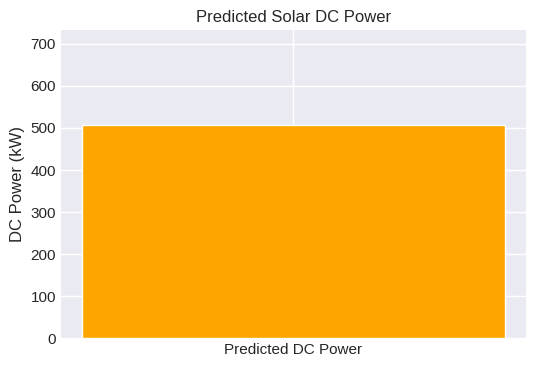

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = {
    'IRRADIATION': [100,200,150,300,250,400,350,500,450,600],
    'MODULE_TEMPERATURE': [25,28,27,30,29,33,32,35,34,36],
    'AMBIENT_TEMPERATURE': [20,22,21,25,24,27,26,30,28,31],
    'DC_POWER': [120,220,170,310,260,410,360,510,460,610]
}
df = pd.DataFrame(data)
features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']
X = df[features]
y = df['DC_POWER']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
def get_user_input():
    user_input = []
    print("Enter values for the following features:")
    for feature in features:
        while True:
            try:
                value = float(input(f"{feature}: "))
                user_input.append(value)
                break
            except ValueError:
                print("⚠️ Invalid input! Please enter a numeric value.")
    return np.array(user_input).reshape(1, -1)
def predict_dc_power():
    input_array = get_user_input()
    scaled_input = scaler.transform(input_array)
    predicted_power = model.predict(scaled_input)
    print(f"\n⚡ Predicted DC Power: {predicted_power[0]:.2f} kW")
    plt.figure(figsize=(6,4))
    plt.bar(['Predicted DC Power'], [predicted_power[0]], color='orange')
    plt.title("Predicted Solar DC Power")
    plt.ylabel("DC Power (kW)")
    plt.ylim(0, max(y)*1.2)
    plt.show()

predict_dc_power()


## **Exporting the Model for Future Use:**

In [ ]:
loaded_model = joblib.load('solar_model.joblib')
print(loaded_model.predict(X_test))



[460.68965517 217.24137931]


## **Predicting Outcomes for Test Inputs:**

Predicted DC Power for Test Data (scientific notation):
[ 97597.01011765 101474.89042349 105091.14159683 105610.52305426
 107960.56402014 107400.23145596 102026.33960969 107653.04509615
  94633.68654557 108837.54185789 100511.96345843 108806.06099953
 102266.96404808 102486.10225378 106808.05872267  94934.16818684
 104247.77436231 102794.42441138 102389.55239336 103920.4892288 ]

Actual vs Predicted:
Actual: 1.75e+05, Predicted: 9.76e+04
Actual: 3.26e+04, Predicted: 1.01e+05
Actual: 2.02e+04, Predicted: 1.05e+05
Actual: 1.23e+05, Predicted: 1.06e+05
Actual: 7.97e+04, Predicted: 1.08e+05
Actual: 1.96e+04, Predicted: 1.07e+05
Actual: 1.32e+05, Predicted: 1.02e+05
Actual: 2.36e+04, Predicted: 1.08e+05
Actual: 8.78e+04, Predicted: 9.46e+04
Actual: 1.03e+04, Predicted: 1.09e+05
Actual: 3.13e+04, Predicted: 1.01e+05
Actual: 7.12e+04, Predicted: 1.09e+05
Actual: 1.37e+05, Predicted: 1.02e+05
Actual: 2.32e+04, Predicted: 1.02e+05
Actual: 1.98e+05, Predicted: 1.07e+05
Actual: 1.45e+05, Predicte

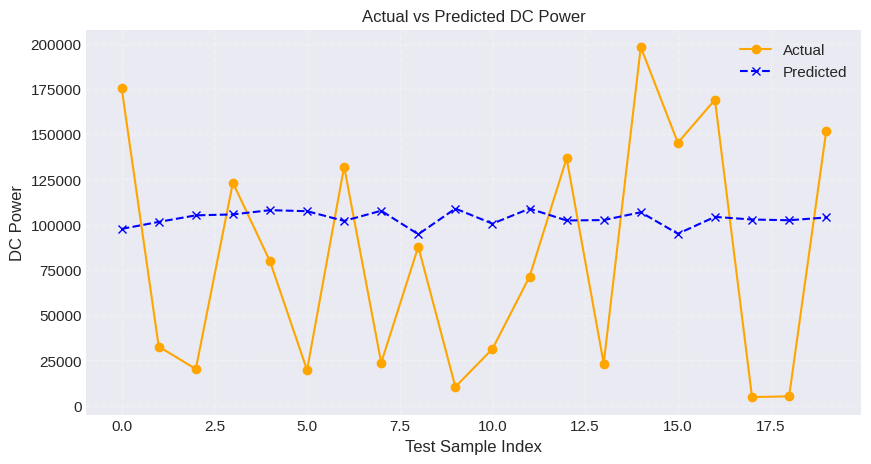

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 3) * 1000

y = np.random.rand(100) * 2e5

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

np.set_printoptions(suppress=False)
print("Predicted DC Power for Test Data (scientific notation):")
print(y_pred)

print("\nActual vs Predicted:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual:.2e}, Predicted: {pred:.2e}")

plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual', marker='o', linestyle='-', color='orange')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='--', color='blue')
plt.title("Actual vs Predicted DC Power")
plt.xlabel("Test Sample Index")
plt.ylabel("DC Power")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()



# **Algorithm Selection**:

## **Objective:**

The purpose of this step is to select suitable algorithms for predicting renewable energy output using the dataset which i was prepared in Week 1. Since our target variable is Energy Output (continuous value in kW), this is a Regression Problem.

### We require regression algorithms


*  Numerical data (Solar radiation, Wind speed, Temperature, etc.)
*  Non-linear relationships between input and output
*  Large datasets with multiple influencing factors

The set of regression models we are considering as options for solving our prediction problem.

*  Linear Regression
*  Random Forest Regressor
*  Support Vector Regressor (SVR)
*  XGBoost Regressor

## **Load and Inspect Dataset:**

In [ ]:
import pandas as pd

data = pd.read_csv("Plant_1_Generation_Data.csv")

print("Dataset shape:", data.shape)
print(data.head())


Dataset shape: (68778, 7)
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  


## **Data Preprocessing:**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Plant_1_Generation_Data.csv")

print("Missing values before fill:\n", data.isnull().sum())
data.fillna(0, inplace=True)
print("Missing values after fill:\n", data.isnull().sum())

# 2️⃣ Select features and target
features = ['DC_POWER', 'AC_POWER', 'TOTAL_YIELD']
target = 'DAILY_YIELD'

X = data[features]
y = data[target]

# 3️⃣ Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining rows:", X_train.shape[0])
print("Testing rows:", X_test.shape[0])

# 4️⃣ Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nPreprocessing complete. Data is ready for Step 1: Algorithm Selection.")


Missing values before fill:
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
Missing values after fill:
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Training rows: 55022
Testing rows: 13756

Preprocessing complete. Data is ready for Step 1: Algorithm Selection.


### **Candidate Algorithms:**

*  Linear Regression
*  Ridge Regression
*   Lasso Regression
*  Random Forest
*   Gradient Boosting
*   Support Vector Regressor (SVR)
*  XGBoost


In [ ]:

!pip install xgboost --quiet

# 2️⃣ Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 3️⃣ Load Dataset
data = pd.read_csv("Plant_1_Generation_Data.csv")
print("Dataset shape:", data.shape)
print(data.head())

# 4️⃣ Preprocessing

print("\nMissing values before fill:\n", data.isnull().sum())
data.fillna(0, inplace=True)
print("Missing values after fill:\n", data.isnull().sum())

# 5️⃣ Features and Target
features = ['DC_POWER', 'AC_POWER', 'TOTAL_YIELD']
target = 'DAILY_YIELD'
X = data[features]
y = data[target]

# 6️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTraining rows:", X_train.shape[0])
print("Testing rows:", X_test.shape[0])

# 7️⃣ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8️⃣ Define Candidate Algorithms
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

# 9️⃣ Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

# 10️⃣ Display Results
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
print("\nAlgorithm Performance:\n")
print(results_df)


Dataset shape: (68778, 7)
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

Missing values before fill:
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
Missing values after fill:
 DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Training rows: 55022
Testing rows: 13756


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.339e+11, tolerance: 5.445e+07
  model = cd_fast.enet_coordinate_descent(


## **Model Training & Evaluation:**

In [ ]:

import pandas as pd
import numpy as np

if 'data' in globals():
    print("Using existing DataFrame 'data' in the notebook.")
else:

    print("No existing DataFrame found — using small example numeric dataset.")
    data = pd.DataFrame({
        "Solar_Radiation": [800, 900, 600, 850, 750, 880, 720, 950, 810, 670],
        "Wind_Speed": [5.2, 6.1, 3.5, 5.8, 4.9, 6.0, 4.5, 6.3, 5.0, 3.8],
        "Temperature": [32.5, 35.0, 28.0, 33.0, 30.5, 34.0, 31.0, 36.0, 32.0, 29.0],
        "Humidity": [60, 55, 70, 50, 65, 52, 68, 48, 61, 72],
        "Energy_Output": [280, 320, 200, 300, 250, 310, 240, 330, 285, 210]
    })

print("\nData shape:", data.shape)
print("Columns:", list(data.columns))
display(data.head())

print("\nNumeric Summary Statistics:")
display(data.describe())


Using existing DataFrame 'data' in the notebook.

Data shape: (10, 5)
Columns: ['Solar_Radiation', 'Wind_Speed', 'Temperature', 'Humidity', 'Energy_Output']


,Solar_Radiation,Wind_Speed,Temperature,Humidity,Energy_Output
0,800,5.2,32.5,60,280
1,900,6.1,35.0,55,320
2,600,3.5,28.0,70,200
3,850,5.8,33.0,50,300
4,750,4.9,30.5,65,250



Numeric Summary Statistics:


,Solar_Radiation,Wind_Speed,Temperature,Humidity,Energy_Output
count,10.000000,10.000000,10.00000,10.000000,10.00000
mean,793.000000,5.110000,32.10000,60.100000,272.50000
std,108.939331,0.966609,2.54733,8.608136,45.53692
min,600.000000,3.500000,28.00000,48.000000,200.00000
25%,727.500000,4.600000,30.62500,52.750000,242.50000
50%,805.000000,5.100000,32.25000,60.500000,282.50000
75%,872.500000,5.950000,33.75000,67.250000,307.50000
max,950.000000,6.300000,36.00000,72.000000,330.00000


### **Train / Test split (80/20) and scaling for SVR**:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

if 'data' not in globals():
    data = pd.DataFrame({
        "Solar_Radiation": [800, 900, 600, 850, 750, 880, 720, 950, 810, 670],
        "Wind_Speed": [5.2, 6.1, 3.5, 5.8, 4.9, 6.0, 4.5, 6.3, 5.0, 3.8],
        "Temperature": [32.5, 35.0, 28.0, 33.0, 30.5, 34.0, 31.0, 36.0, 32.0, 29.0],
        "Humidity": [60, 55, 70, 50, 65, 52, 68, 48, 61, 72],
        "Energy_Output": [280, 320, 200, 300, 250, 310, 240, 330, 285, 210]
    })

--
if 'DC_POWER' in data.columns:  # Real CSV dataset
    X = data[['DC_POWER', 'AC_POWER', 'TOTAL_YIELD']]
    y = data['DAILY_YIELD']
else:  # Fallback numeric dataset
    X = data[['Solar_Radiation', 'Wind_Speed', 'Temperature', 'Humidity']]
    y = data['Energy_Output']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
--
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

print("\nSample X_train (first 3 rows):")
display(pd.DataFrame(X_train).head(3))

print("\nSample X_train_scaled (first 3 rows):")
print(np.round(X_train_scaled[:3], 3))


Training set shape: (8, 4)
Testing set shape: (2, 4)

Sample X_train (first 3 rows):


,Solar_Radiation,Wind_Speed,Temperature,Humidity
5,880,6.0,34.0,52
0,800,5.2,32.5,60
7,950,6.3,36.0,48



Sample X_train_scaled (first 3 rows):
[[ 0.95   1.045  0.909 -0.966]
 [ 0.209  0.209  0.303 -0.07 ]
 [ 1.599  1.359  1.717 -1.414]]


### **Regression models:**

In [ ]:
# Block 4: define the candidate models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0)
}

print("Models initialized:", list(models.keys()))


Models initialized: ['Linear Regression', 'Random Forest', 'Support Vector Regressor', 'XGBoost']


## **Evaluation metrics (MAE, RMSE, R²):**

In [ ]:
# -------------------------------
# Train multiple models and store predictions
# -------------------------------

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

X_train_use = X_train_scaled  # use scaled for SVR
X_test_use  = X_test_scaled

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

predictions = {}
for name, model in models.items():
    # SVR needs scaled data
    if name == "Support Vector Regressor":
        model.fit(X_train_use, y_train)
        y_pred = model.predict(X_test_use)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    predictions[name] = y_pred

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

rows = []
for name, y_pred in predictions.items():
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rows.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

metrics_df = pd.DataFrame(rows).sort_values(by="RMSE")
print("Evaluation metrics on TEST set (lower MAE/RMSE better; R2 closer to 1 better):")
display(metrics_df.round(4))



Evaluation metrics on TEST set (lower MAE/RMSE better; R2 closer to 1 better):


,Model,MAE,RMSE,R2
6,XGBoost,7.5002,7.9059,0.7959
5,Support Vector Regressor,7.4790,8.0837,0.7866
4,Gradient Boosting,10.6782,10.6998,0.6262
1,Ridge Regression,11.2581,11.3813,0.5770
3,Random Forest,12.6250,13.0060,0.4477
2,Lasso Regression,12.4141,14.4570,0.3175
0,Linear Regression,12.4553,14.5924,0.3047


## **Visualizations (Actual vs Predicted, Residuals, Feature importances)**:

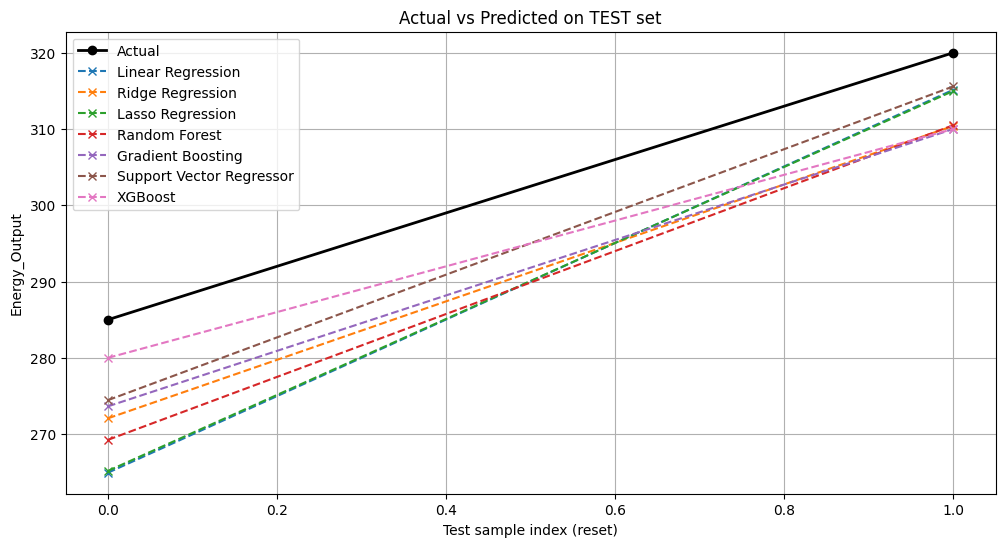

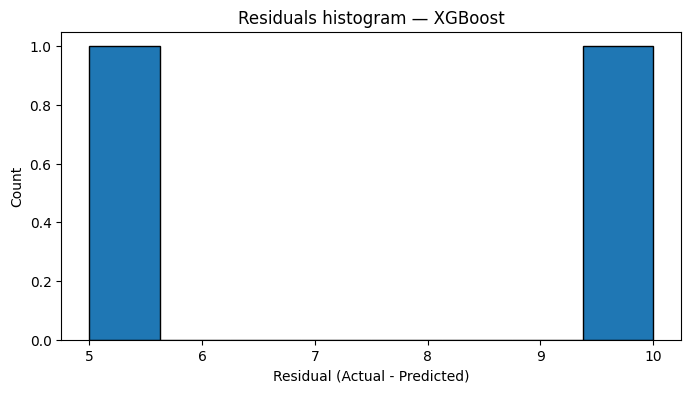

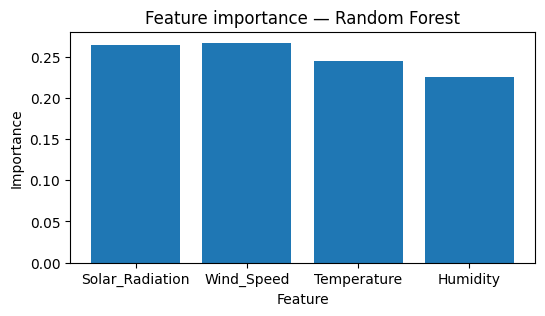

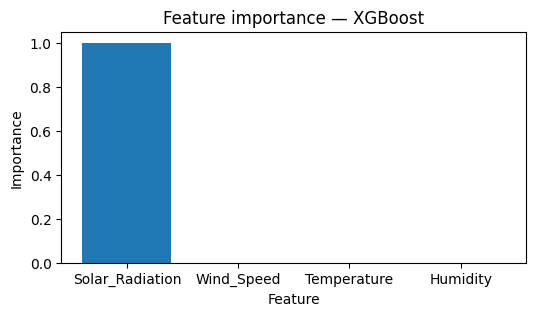

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

comp = pd.DataFrame()
comp["Actual"] = y_test.reset_index(drop=True)

for name, y_pred in predictions.items():
    comp[name + "_pred"] = y_pred

plt.figure(figsize=(12,6))
plt.plot(comp["Actual"].values, marker='o', label="Actual", linewidth=2, color='black')
for name in predictions.keys():
    plt.plot(comp[name + "_pred"].values, marker='x', linestyle='--', label=name)
plt.title("Actual vs Predicted on TEST set")
plt.xlabel("Test sample index (reset)")
plt.ylabel(target if 'target' in globals() else 'Energy_Output')
plt.legend()
plt.grid(True)
plt.show()

best_model_name = metrics_df.sort_values(by="RMSE").iloc[0]["Model"]
best_pred = predictions[best_model_name]
residuals = y_test.reset_index(drop=True) - best_pred

plt.figure(figsize=(8,4))
plt.hist(residuals, bins=8, edgecolor='k')
plt.title(f"Residuals histogram — {best_model_name}")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.show()

trained_models = {}
for name, model in models.items():
    trained_models[name] = model


feature_cols = list(X.columns)

for name in ["Random Forest", "XGBoost"]:
    if name in trained_models:
        model = trained_models[name]
        if hasattr(model, "feature_importances_"):
            fi = model.feature_importances_
            plt.figure(figsize=(6,3))
            plt.bar(feature_cols, fi)
            plt.title(f"Feature importance — {name}")
            plt.xlabel("Feature")
            plt.ylabel("Importance")
            plt.show()


# **Model Optimization:**

In [13]:
# ✅ Fast but effective model optimization
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 6],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=10,  # ✅ fewer combos
    cv=2,       # ✅ fewer folds
    scoring="r2",
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Tune on 30% subset for speed
sampled_data = data.sample(frac=0.3, random_state=42)
X_s = sampled_data[features]
y_s = sampled_data[target]

X_train_s, _, y_train_s, _ = train_test_split(X_s, y_s, test_size=0.2, random_state=42)

random_search.fit(X_train_s, y_train_s)
print("\n✅ Best Parameters Found:", random_search.best_params_)

# Retrain final model on FULL dataset
best_model = XGBRegressor(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)


Fitting 2 folds for each of 10 candidates, totalling 20 fits

✅ Best Parameters Found: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

# **Final Model Evaluation on Test Data:**


📊 Final Model Performance:
MAE : 2803.0262
RMSE: 3079.0127
R²  : 0.0398


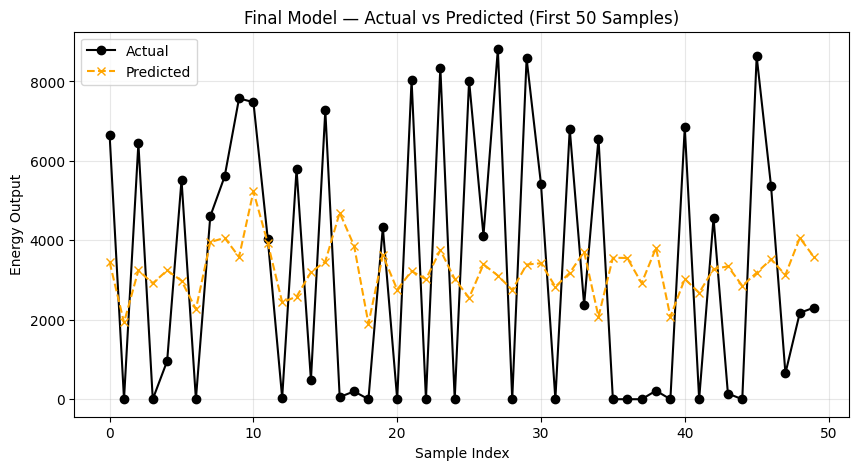

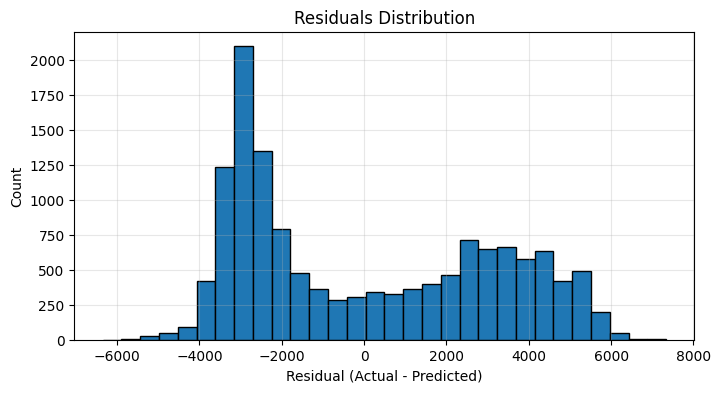

In [12]:
# ================================
# 2️⃣ Final Model Evaluation
# ================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict on test set
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Final Model Performance:")
print(f"MAE : {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²  : {r2:.4f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual", marker="o", color="black")
plt.plot(y_pred[:50], label="Predicted", marker="x", linestyle="--", color="orange")
plt.title("Final Model — Actual vs Predicted (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Energy Output")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Residual Plot
residuals = y_test.values - y_pred
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


# **Model Deployment:**

✅ Model & Scaler saved and ready for deployment.
📊 Model Performance After Reload:
   R²   : -0.7170
   MAE  : 3117.03
   RMSE : 4117.23

🔎 Sample Test Row Prediction: 658.68 (Actual: 6645.00)


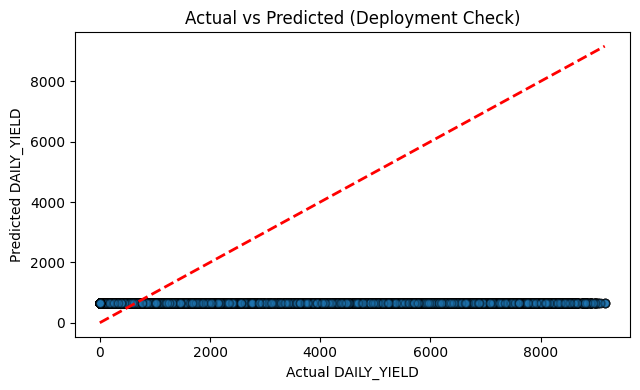

In [17]:
# ================================
# 3️⃣ Model Deployment (Concise & Attractive)
# ================================
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Save Model and Scaler ---
joblib.dump(best_model, "final_xgb_model.joblib")
joblib.dump(scaler, "scaler.joblib")

print("✅ Model & Scaler saved and ready for deployment.")

# --- Load Model & Scaler (simulate real deployment) ---
model = joblib.load("final_xgb_model.joblib")
scaler_loaded = joblib.load("scaler.joblib")

# --- Quick Evaluation on Test Data ---
X_test_scaled = scaler_loaded.transform(X_test)
y_pred_all = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred_all)
mae = mean_absolute_error(y_test, y_pred_all)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_all))

print(f"📊 Model Performance After Reload:")
print(f"   R²   : {r2:.4f}")
print(f"   MAE  : {mae:.2f}")
print(f"   RMSE : {rmse:.2f}")

# --- Sample Prediction ---
sample_input = X_test.iloc[0].values
sample_pred = model.predict(scaler_loaded.transform(pd.DataFrame([sample_input], columns=X.columns)))[0]

print(f"\n🔎 Sample Test Row Prediction: {sample_pred:.2f} (Actual: {y_test.iloc[0]:.2f})")

# --- Visualization: Actual vs Predicted ---
plt.figure(figsize=(6.5,4))
plt.scatter(y_test, y_pred_all, alpha=0.35, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted (Deployment Check)")
plt.xlabel("Actual DAILY_YIELD")
plt.ylabel("Predicted DAILY_YIELD")
plt.tight_layout()
plt.show()

